# Bellman equation

In [1]:
import numpy as np
from scipy import linalg
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image
import pydot
import latexify


Given a set of states $S={1,2,3}$, a state transition probability matrix $P$, a reward matrix $R$ and a discount $\gamma$, where:

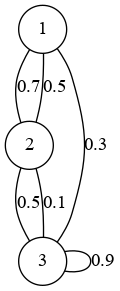

In [2]:
G=nx.MultiGraph()
G.add_edge('1', '2', weight=0.7)
G.add_edge('1', '3', weight=0.3)
G.add_edge('2', '1', weight=0.5)
G.add_edge('2', '3', weight=0.5)
G.add_edge('3', '2', weight=0.1)
G.add_edge('3', '3', weight=0.9)

for edge in G.edges(data=True): edge[2]['label'] = edge[2]['weight']
G.add_nodes_from([1, 2, 3], shape="circle")
node_label = nx.get_node_attributes(G,'id')
pos = nx.spring_layout(G)

pydotGraph = nx.drawing.nx_pydot.to_pydot(G)
display(Image(pydotGraph.create_png()))

In [3]:
P = np.array([[0, 0.7, 0.3], 
              [0.5, 0, 0.5], 
              [0, 0.1, 0.9]])

R = np.array([[0, 1, 10],
              [0, 0, 1],
              [0, -1, 10]])

gamma = 0.9

The expected value of the reward is calculated by:

$$R_e =  \sum_{r\in R}r \sum_{s'\in s} P(s',r|s,a)$$

In its matrix representation
$$
\mathbf{R_e} = 
\begin{pmatrix}
r_{00}\\
r_{10}\\
r_{20} 
\end{pmatrix}
$$

where element $r_{ij}$ can be obtained by:
$$r_{ij} = \sum R_{i} \sum P_{i}$$

In [4]:
R_e = np.sum(R*P, axis=1, keepdims=True)
R_e

array([[3.7],
       [0.5],
       [8.9]])

## Direct solution

Using linear algebra to isolate the value function in the bellman equation, the following equation is obtained:

$$(\mathbf{I} - \gamma\mathbf{P}) \mathbf{V} = \mathbf{R_e} $$

The direct solution can be obtained by

$$\mathbf{V} = (\mathbf{I} - \gamma\mathbf{P})^{-1} \mathbf{R_e} $$

$$
\begin{pmatrix}
v_1\\
v_2\\
v_3 
\end{pmatrix}
=
\left( 
\begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{pmatrix}
-\gamma
\begin{pmatrix}
0 & 0.7 & 0.3\\
0.5 & 0 & 0.5\\
0 & 0.1 & 0.9
\end{pmatrix}
\right)^{-1}
\begin{pmatrix}
3.7\\
0.5\\
8.9 
\end{pmatrix}
$$

$$
\mathbf{V} = 
\begin{pmatrix}
65.5\\
64.9\\
77.5 
\end{pmatrix}
$$

In [5]:
V1 = np.dot(np.linalg.inv(np.identity(3)-gamma*P), R_e)
V1

array([[65.540732  ],
       [64.90791027],
       [77.5879575 ]])

## Library solution

Or solving the equations system using the library presented in classes

$$\mathbf{R_e} = (\mathbf{I} - \gamma\mathbf{P}) \mathbf{V} $$

$$
\begin{pmatrix}
3.7\\
0.5\\
8.9 
\end{pmatrix}
=
\left( 
\begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{pmatrix}
-\gamma
\begin{pmatrix}
0 & 0.7 & 0.3\\
0.5 & 0 & 0.5\\
0 & 0.1 & 0.9
\end{pmatrix}
\right)
\begin{pmatrix}
v_1\\
v_2\\
v_3 
\end{pmatrix}
$$

$$
\begin{pmatrix}
3.7\\
0.5\\
8.9 
\end{pmatrix}
=
\begin{pmatrix}
1 & -0.63 & -0.27\\
-0.45 & 1 & -0.45\\
0 & -0.09 & 0.19
\end{pmatrix}
\begin{pmatrix}
v_1\\
v_2\\
v_3 
\end{pmatrix}
$$

$$
\mathbf{V} = 
\begin{pmatrix}
65.5\\
64.9\\
77.5 
\end{pmatrix}
$$

In [6]:
A=np.eye(3) - gamma*P
B=R_e
V2=linalg.solve(A,B)
V2

array([[65.540732  ],
       [64.90791027],
       [77.5879575 ]])